In [ ]:
import nltk
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.special import expit
#nltk.download('wordnet') # run this if you are running for the first time on a new machine.
#nltk.download('stopwords') # run this if you are running for the first time on a ne

import string

import csv

import re

from statsmodels.stats.outliers_influence import variance_inflation_factor
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
reviews_train = load_files("aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

print("Number of documents in train data: {}".format(len(text_train)))
print("Samples per class (train): {}".format(np.bincount(y_train)))

reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target

print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))




Number of documents in train data: 25000
Samples per class (train): [12500 12500]
Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [ ]:
categories = ['negative','positive']

class LemmaTokenizer(object):
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [ ]:

#takes about 4 minutes because data too big
vect=TfidfVectorizer(min_df=25, ngram_range=(1,2), stop_words='english',tokenizer=LemmaTokenizer())
vect.fit(text_train)

X_train = vect.transform(text_train)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

print(X_train)

C:\Users\HASAN\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Vocabulary size: 21926
Number of features: 21926
  (0, 21906)	0.11867790407122258
  (0, 21868)	0.07062769726114684
  (0, 21687)	0.0695210997501014
  (0, 19855)	0.11679678693285706
  (0, 19847)	0.05431170683368123
  (0, 19715)	0.08653999399822486
  (0, 19710)	0.21208439274268426
  (0, 19346)	0.12065615716676824
  (0, 18470)	0.12945557419752662
  (0, 17141)	0.12065615716676824
  (0, 16466)	0.16128957407383882
  (0, 16464)	0.12196879375937876
  (0, 15807)	0.16128957407383882
  (0, 15802)	0.08635632633181531
  (0, 15407)	0.09447539818991392
  (0, 14692)	0.1532763210796932
  (0, 14399)	0.031625283152542254
  (0, 14375)	0.13591451474194224
  (0, 14268)	0.14910794245945053
  (0, 14034)	0.08599354885963803
  (0, 13245)	0.11223320205631339
  (0, 12982)	0.07983332016120623
  (0, 11758)	0.08517498423069995
  (0, 11638)	0.143702184036974
  (0, 11632)	0.11041381137462226
  :	:
  (24999, 996)	0.046814244833290365
  (24999, 994)	0.046069478462753964
  (24999, 986)	0.1934447508480433
  (24999, 962)	0.

In [ ]:

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split( X_train, y_train, train_size = 0.80 )

print(Y_TRAIN)

[1 1 0 ... 0 0 0]


In [ ]:
print(Y_TRAIN)

[1 1 0 ... 0 0 0]


In [ ]:
    
lr = LogisticRegressionCV(cv=5, max_iter=10000)
lr.fit(X_TRAIN, Y_TRAIN)


Accuracy = 0.8958


In [ ]:


Predicted= lr.predict(X_TEST)
Prediction_accuracy=accuracy_score(Y_TEST, Predicted)
print("Final Accuracy: ", Prediction_accuracy) 



Final Accuracy:  0.8958


In [ ]:
conf_mat=confusion_matrix(Y_TEST, Predicted)


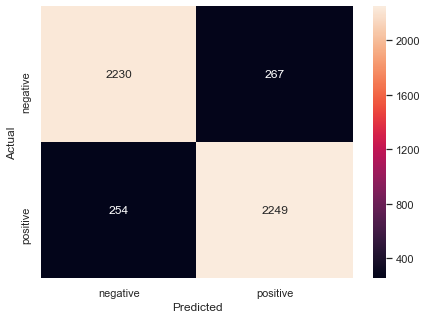

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
pred_test = lr.predict(vect.transform(text_test))

[[11020  1480]
 [ 1453 11047]] 

25000 



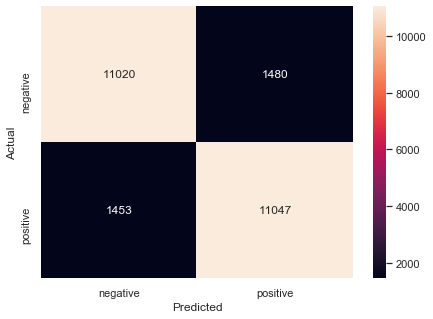

In [ ]:
conf_mat1=confusion_matrix(y_test, pred_test)
print(conf_mat1, "\n")
print(conf_mat1.sum(), "\n")


fig, ax = plt.subplots(figsize=(7,5))

sns.heatmap(conf_mat1, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print("My accuracy on test data for negative reviews: ", 100*(conf_mat1[0][0]/(conf_mat1.sum()/2)))

My accuracy on test data for negative reviews:  88.16000000000001


In [ ]:
print("My accuracy on test data for positive reviews: ", 100*(conf_mat1[1][1]/(conf_mat1.sum()/2)))

My accuracy on test data for positive reviews:  88.376


In [ ]:
print(classification_report(y_test, pred_test, target_names=categories))

              precision    recall  f1-score   support

    negative       0.88      0.88      0.88     12500
    positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [ ]:
print(classification_report(Y_TEST, Predicted, target_names=categories))

              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      2497
    positive       0.89      0.90      0.90      2503

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000

